In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Korinthou'
raceDate = '21/10/2023'
surface = 'Gravel'
competition = 'Cup'

link = 'https://www.ewrc-results.com/results/85677-rally-sprint-korinthou-2023/?s='
startat, no_ss=440947, int(3)
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in range(0,(no_ss)):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#2,Ismailos Panos,C2,8:02.56,-,85.6,1,Korinthou,21/10/2023,Gravel,Cup,1
1,2,#6,Mider - Nasso,C2,8:05.99,+3.43 + 3.43,85.0 0.30,1,Korinthou,21/10/2023,Gravel,Cup,2
2,3,#8,Lefkaditis Sav,C3 F2,8:10.72,+8.16 + 4.73,84.1 0.71,1,Korinthou,21/10/2023,Gravel,Cup,3
3,4,#1,Paradissis P.,C2,8:22.48,+19.92 + 11.76,82.2 1.74,1,Korinthou,21/10/2023,Gravel,Cup,4
4,5,#12,Dimopoulos Ant,C4 F2,8:24.74,+22.18 + 2.26,81.8 1.93,1,Korinthou,21/10/2023,Gravel,Cup,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,25,#24,Sotiropoulos N,C6 F2,9:31.31,+1:31.67 + 1.93,72.3 7.99,3,Korinthou,21/10/2023,Gravel,Cup,25
25,26,#26,Delaportas Gio,4,9:36.81,+1:37.17 + 5.50,71.6 8.47,3,Korinthou,21/10/2023,Gravel,Cup,26
26,27,#28,Kotsopoulos An,C3 F2,9:54.70,+1:55.06 + 17.89,69.4 10.0,3,Korinthou,21/10/2023,Gravel,Cup,27
27,28,#37,Kattis Dimítri,C6 F2,10:48.24,+2:48.60 + 53.54,63.7 14.7,3,Korinthou,21/10/2023,Gravel,Cup,28


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [8]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.jpg'))


In [9]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv(str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Ismailos Panos,C2,1,Korinthou,21/10/2023,Gravel,Cup,1,482.56
1,Mider - Nasso,C2,1,Korinthou,21/10/2023,Gravel,Cup,2,485.99
2,Lefkaditis Sav,C3 F2,1,Korinthou,21/10/2023,Gravel,Cup,3,490.72
3,Paradissis P.,C2,1,Korinthou,21/10/2023,Gravel,Cup,4,502.48
4,Dimopoulos Ant,C4 F2,1,Korinthou,21/10/2023,Gravel,Cup,5,504.74
...,...,...,...,...,...,...,...,...,...
24,Sotiropoulos N,C6 F2,3,Korinthou,21/10/2023,Gravel,Cup,25,571.31
25,Delaportas Gio,4,3,Korinthou,21/10/2023,Gravel,Cup,26,576.81
26,Kotsopoulos An,C3 F2,3,Korinthou,21/10/2023,Gravel,Cup,27,594.70
27,Kattis Dimítri,C6 F2,3,Korinthou,21/10/2023,Gravel,Cup,28,648.24


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race      ss          
Korinthou 1     482.56
          2     475.90
          3     479.64

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Ismailos Panos,C2,1,Korinthou,21/10/2023,Gravel,Cup,1,482.56,482.56,0.00,0.000000,01
1,Mider - Nasso,C2,1,Korinthou,21/10/2023,Gravel,Cup,2,485.99,482.56,3.43,0.710792,01
2,Lefkaditis Sav,C3 F2,1,Korinthou,21/10/2023,Gravel,Cup,3,490.72,482.56,8.16,1.690981,01
3,Paradissis P.,C2,1,Korinthou,21/10/2023,Gravel,Cup,4,502.48,482.56,19.92,4.127984,01
4,Dimopoulos Ant,C4 F2,1,Korinthou,21/10/2023,Gravel,Cup,5,504.74,482.56,22.18,4.596320,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Sotiropoulos N,C6 F2,3,Korinthou,21/10/2023,Gravel,Cup,25,571.31,479.64,91.67,19.112251,03
92,Delaportas Gio,4,3,Korinthou,21/10/2023,Gravel,Cup,26,576.81,479.64,97.17,20.258944,03
93,Kotsopoulos An,C3 F2,3,Korinthou,21/10/2023,Gravel,Cup,27,594.70,479.64,115.06,23.988825,03
94,Kattis Dimítri,C6 F2,3,Korinthou,21/10/2023,Gravel,Cup,28,648.24,479.64,168.60,35.151364,03


In [12]:
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Ismailos Panos,C2,1,Korinthou,21/10/2023,Gravel,Cup,1,482.56,482.56,0.00,0.000000,01
1,Mider - Nasso,C2,1,Korinthou,21/10/2023,Gravel,Cup,2,485.99,482.56,3.43,0.710792,01
3,Paradissis P.,C2,1,Korinthou,21/10/2023,Gravel,Cup,4,502.48,482.56,19.92,4.127984,01
6,Zygogiannis K.,C2,1,Korinthou,21/10/2023,Gravel,Cup,7,513.24,482.56,30.68,6.357759,01
7,Tsatsaris Aris,C2,1,Korinthou,21/10/2023,Gravel,Cup,8,515.27,482.56,32.71,6.778432,01
17,Gazetas H. -,C2,1,Korinthou,21/10/2023,Gravel,Cup,18,552.03,482.56,69.47,14.396137,01
29,Sias Haralambo,C2,1,Korinthou,21/10/2023,Gravel,Cup,30,603.99,482.56,121.43,25.163710,01
34,Ismailos Panos,C2,2,Korinthou,21/10/2023,Gravel,Cup,1,475.90,475.90,0.00,0.000000,02
36,Paradissis P.,C2,2,Korinthou,21/10/2023,Gravel,Cup,3,487.37,475.90,11.47,2.410170,02
39,Zygogiannis K.,C2,2,Korinthou,21/10/2023,Gravel,Cup,6,504.40,475.90,28.50,5.988653,02


In [13]:
ss_times_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race           Korinthou              
SS.                   01     02     03
Crew                                  
Gazetas H.  -      69.47  81.82  53.61
Ismailos Panos      0.00   0.00   0.00
Mider  - Nasso      3.43    NaN    NaN
Paradissis P.      19.92  11.47   6.04
Sias Haralambo    121.43  92.54  86.39
Tsatsaris Aris     32.71  39.80  41.39
Zygogiannis K.     30.68  28.50  77.82

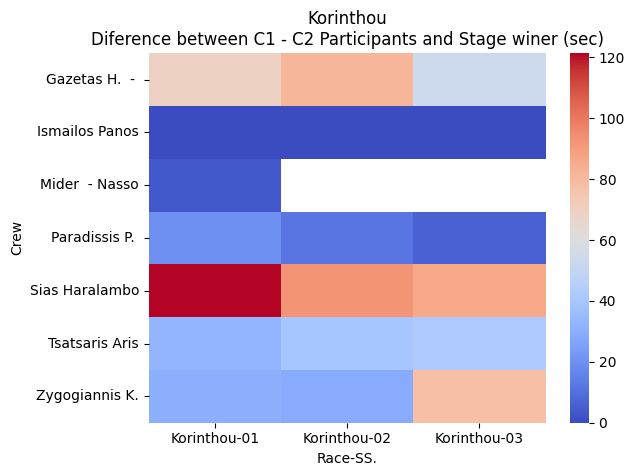

In [14]:
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between C1 - C2 Participants and Stage winer (sec)')
plt.savefig((rallyname) + "Heatmap_C1.png")

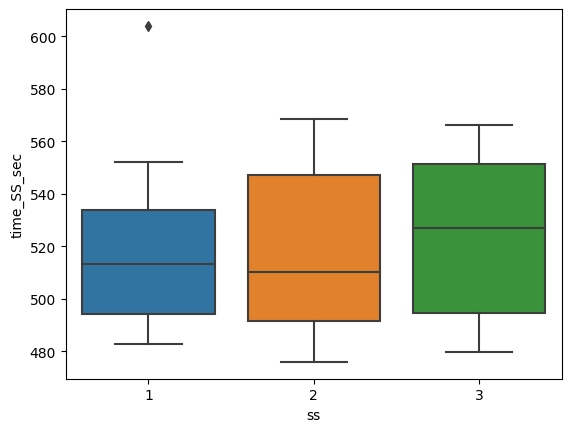

In [15]:
bplt=sns.boxplot( y=ss_times_C6["time_SS_sec"], x=ss_times_C6["ss"])

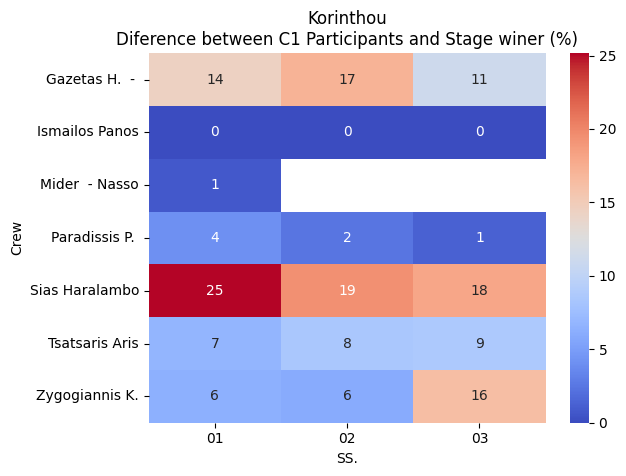

In [16]:
ss_timesa = pd.pivot_table(ss_times_C6, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between C1 Participants and Stage winer (%)')
plt.savefig(rallyname + "C1.jpg")